In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [7]:
df = pd.read_csv('LoanApprovalPrediction.csv')

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Handling Missing Values

In [9]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Approval % by Gender

In [21]:
# Group by Gender and Loan_Status to get the counts
gender_approval_counts = df.groupby(['Gender','Loan_Status']).size().unstack(fill_value=0)
print("\n Raw applicants count")
print(gender_approval_counts)


 Raw applicants count
Loan_Status    N    Y
Gender               
Female        37   74
Male         150  337


In [24]:
# Calculation of Approval Rate
gender_approval_counts['Total_Applicants'] = gender_approval_counts['Y'] + gender_approval_counts['N']
gender_approval_counts['Approval_Rate_%'] = (gender_approval_counts['Y']/gender_approval_counts['Total_Applicants'])*100
print("\n Approval Rate by Gender")
print(gender_approval_counts['Approval_Rate_%'])


 Approval Rate by Gender
Gender
Female    66.666667
Male      69.199179
Name: Approval_Rate_%, dtype: float64


(0.0, 100.0)

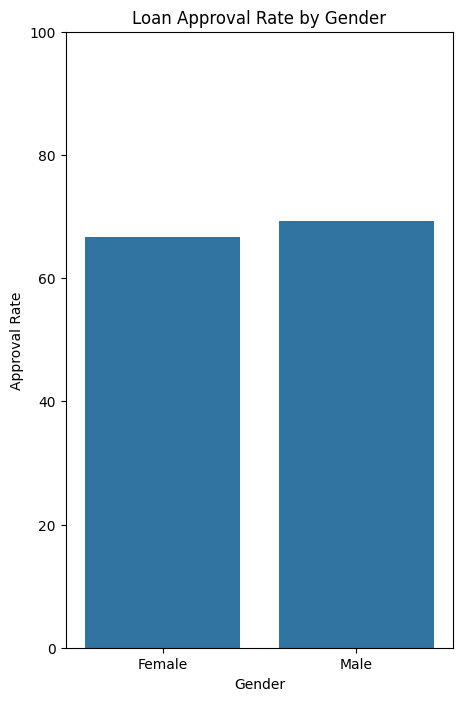

In [33]:
# Visualzation
plt.figure(figsize=(5,8))
sns.barplot(x = gender_approval_counts.index, y = gender_approval_counts['Approval_Rate_%'])
plt.title('Loan Approval Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Approval Rate')
plt.ylim(0,100)

# Approval % by Income

In [34]:
# Understanding income rate
df['ApplicantIncome'].describe()

count      598.000000
mean      5292.252508
std       5807.265364
min        150.000000
25%       2877.500000
50%       3806.000000
75%       5746.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [35]:
# Dividing applicants on basis of income
income = [0, 2500, 5000, 10000, 81000]
category = ['Low', 'Average', 'High', 'Very High']
df['IncomeBin'] = pd.cut(df['ApplicantIncome'], bins=income, labels=category)
print(df[['ApplicantIncome', 'IncomeBin']].head())

   ApplicantIncome IncomeBin
0             5849      High
1             4583   Average
2             3000   Average
3             2583   Average
4             6000      High


In [37]:
# Group by IncomeBin and Loan_Status to get the counts
income_approval_counts = df.groupby(['IncomeBin','Loan_Status'], observed=True).size().unstack(fill_value=0)
print("\n Raw applicants count")
print(income_approval_counts)


 Raw applicants count
Loan_Status   N    Y
IncomeBin           
Low          33   72
Average      95  213
High         42   95
Very High    17   31


In [38]:
# Calculation of Approval Rate
income_approval_counts['Total_Applicants'] = income_approval_counts['Y'] + income_approval_counts['N']
income_approval_counts['Approval_Rate_%'] = (income_approval_counts['Y']/income_approval_counts['Total_Applicants'])*100
print("\n Approval Rate by Income")
print(income_approval_counts['Approval_Rate_%'])


 Approval Rate by Income
IncomeBin
Low          68.571429
Average      69.155844
High         69.343066
Very High    64.583333
Name: Approval_Rate_%, dtype: float64


(0.0, 100.0)

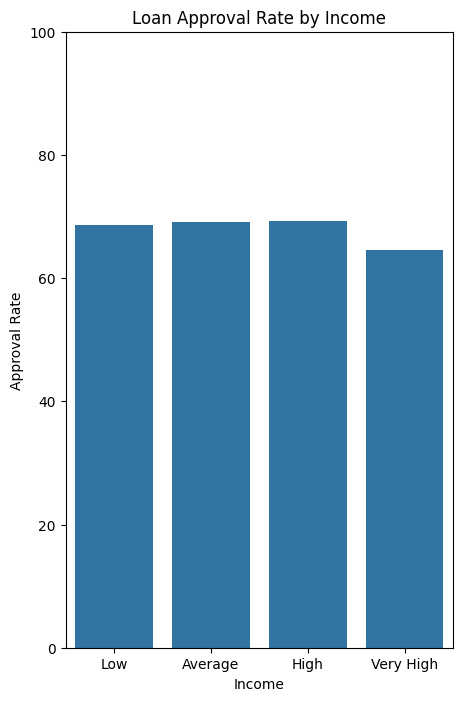

In [39]:
# Visualzation
plt.figure(figsize=(5,8))
sns.barplot(x = income_approval_counts.index, y = income_approval_counts['Approval_Rate_%'])
plt.title('Loan Approval Rate by Income')
plt.xlabel('Income')
plt.ylabel('Approval Rate')
plt.ylim(0,100)

# Correlation Heatmaps

In [40]:
# Correlation works for numerical values so we need to convert categorical values to numerical.
# Making copy of original dataset for safe Transformation
df_corr = df.copy()

In [43]:
# Convering object type data to category so we can get numerical values
for col in df_corr.columns:
    if df_corr[col].dtype == 'object' or df_corr[col].dtype.name == 'category':
        df_corr[col] = df_corr[col].astype('category').cat.codes
df_corr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,IncomeBin
0,0,1,0,0.0,0,0,5849,0.0,127.0,360.0,1.0,2,1,2
1,1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1
3,3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1
4,4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1,2


# Calculating the correlation matrix

In [46]:
correlation_matrix = df_corr.corr()
print(correlation_matrix.head(14))

                    Loan_ID    Gender   Married  Dependents  Education  \
Loan_ID            1.000000 -0.028765 -0.006149    0.060570   0.050140   
Gender            -0.028765  1.000000  0.369612    0.172620   0.048478   
Married           -0.006149  0.369612  1.000000    0.344500   0.014369   
Dependents         0.060570  0.172620  0.344500    1.000000   0.054050   
Education          0.050140  0.048478  0.014369    0.054050   1.000000   
Self_Employed      0.012701 -0.028663 -0.021441    0.040957  -0.015204   
ApplicantIncome    0.029095  0.057386  0.042487    0.084744  -0.139349   
CoapplicantIncome  0.042334  0.083080  0.073830    0.036101  -0.065205   
LoanAmount         0.051142  0.103640  0.144638    0.131133  -0.167403   
Loan_Amount_Term  -0.032392 -0.082771 -0.101137   -0.103481  -0.075839   
Credit_History    -0.030394  0.012708  0.017964   -0.034664  -0.067300   
Property_Area     -0.164682 -0.025794  0.009224    0.002034  -0.061758   
Loan_Status        0.015160  0.021239 

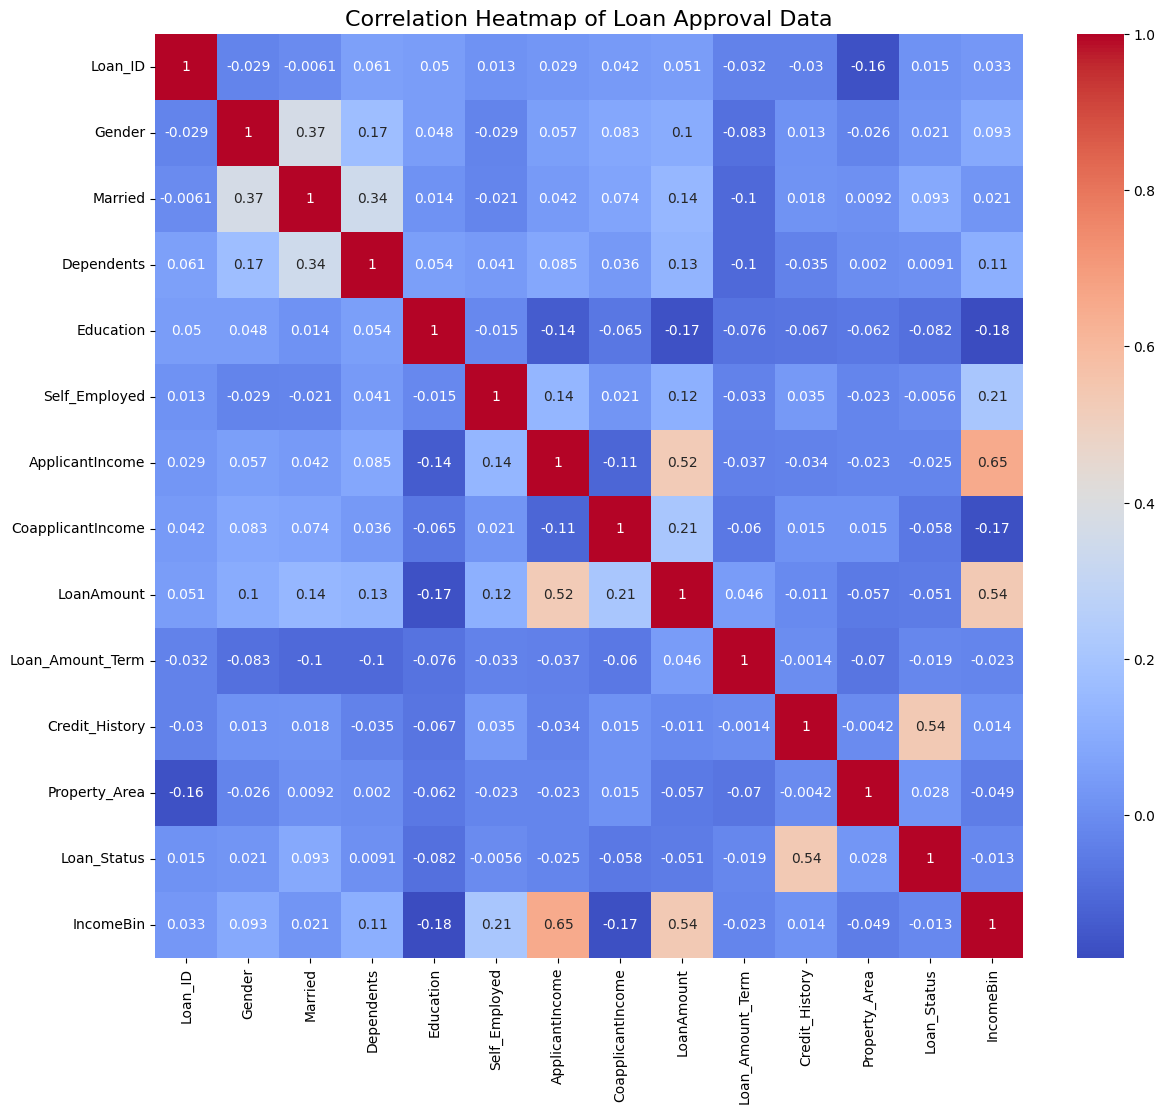

In [47]:
# Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Loan Approval Data', fontsize=16)
plt.show()